In [52]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

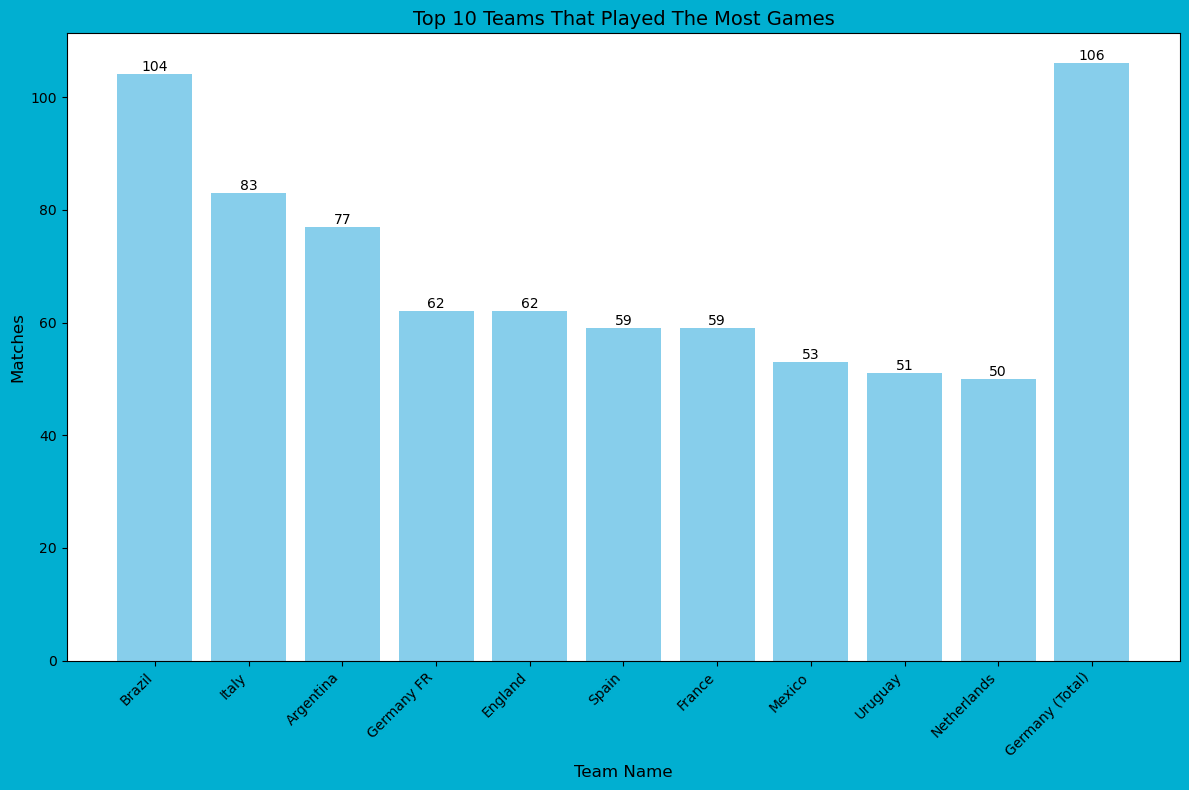

In [50]:
# Load the CSV file into a DataFrame using the correct delimiter and handling quotes
df_ta = pd.read_csv('team_appearances.csv', delimiter=';', quotechar='"')

# Convert `appearances` column to integers, if necessary
df_ta['appearances'] = df_ta['appearances'].astype(int)

# Get only the top 10 teams by appearances
top_teams = df_ta.nlargest(10, 'appearances').copy()

# Calculate Germany total appearances
germany_total_appearances = df_ta[df_ta['Team Name'].str.contains('Germany')]['appearances'].sum()

# Dataframe for Germany total
germany_total_df = pd.DataFrame({'Team Name': ['Germany (Total)'], 'appearances': [germany_total_appearances]})

# Concatenate the DataFrames
top_teams = pd.concat([top_teams, germany_total_df], ignore_index=True)

# Configure the bar chart
plt.figure(figsize=(12, 8), facecolor='#01afd1')
bars = plt.bar(top_teams['Team Name'], top_teams['appearances'], color='skyblue')

# Add title and labels
plt.title('Top 10 Teams That Played The Most Games', fontsize=14)
plt.xlabel('Team Name', fontsize=12)
plt.ylabel('Matches', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Annotate each bar with the number of matches
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')

# Show the chart
plt.tight_layout()  # Adjust layout to make room for the annotations
plt.show()

In [38]:
# Load the CSV file into a DataFrame using the correct delimiter
df_go = pd.read_csv('avg_goals_per_match.csv', delimiter=';', quotechar='"')

In [40]:
# Convert the columns to the appropriate types, if necessary
df_go['year_id'] = df_go['year_id'].astype(int)
df_go['avg_goals_per_match'] = df_go['avg_goals_per_match'].astype(float)

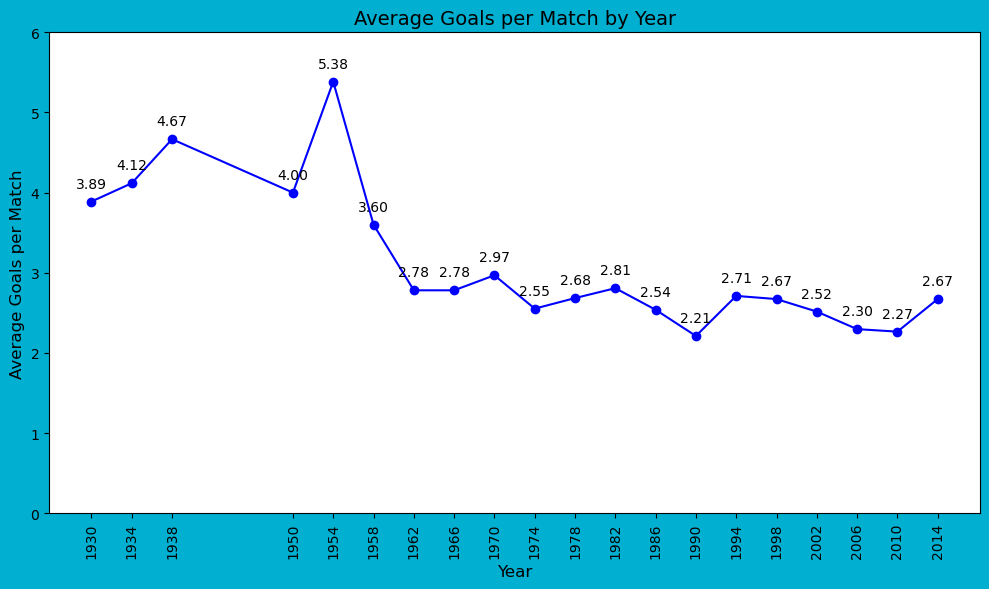

In [64]:
# Configure the line chart
plt.figure(figsize=(10, 6), facecolor='#01afd1')
plt.plot(df_go['year_id'], df_go['avg_goals_per_match'], marker='o', linestyle='-', color='b')

# Add title and labels
plt.title('Average Goals per Match by Year', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Goals per Match', fontsize=12)

# Set y-axis limits
plt.ylim(0, 6)

# Set x-ticks to include all years and rotate them vertically
plt.xticks(df_go['year_id'], rotation=90)

# Annotate each point with the average goals value
for i, row in df_go.iterrows():
    plt.annotate(f"{row['avg_goals_per_match']:.2f}", 
                 (row['year_id'], row['avg_goals_per_match']), 
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center', color='black')

# Show the chart
plt.tight_layout()  # Adjust layout to fit rotated labels
plt.show()

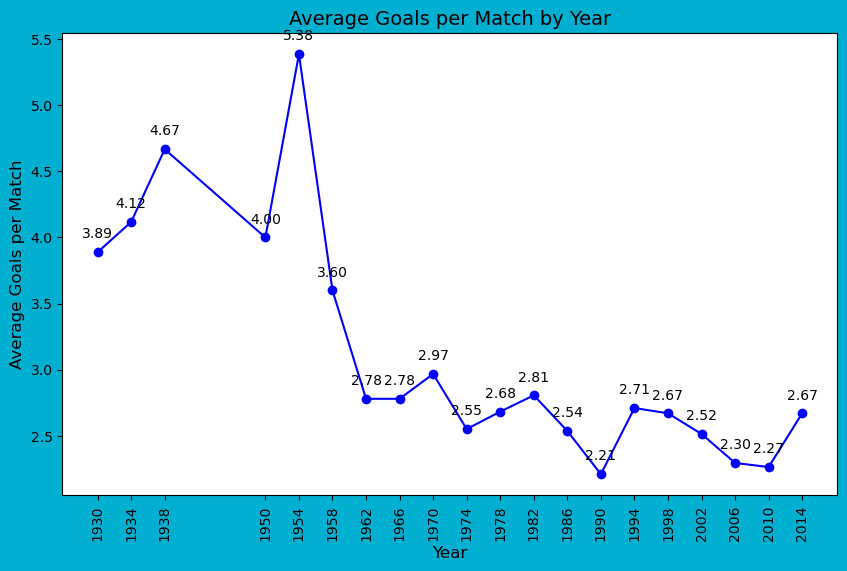

In [44]:
# Configure the line chart
plt.figure(figsize=(10, 6), facecolor='#01afd1')
plt.plot(df_go['year_id'], df_go['avg_goals_per_match'], marker='o', linestyle='-', color='b')

# Add title and labels
plt.title('Average Goals per Match by Year', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Goals per Match', fontsize=12)

# Set x-ticks to include all years and rotate them vertically
plt.xticks(df_go['year_id'], rotation=90)

# Annotate each point with the average goals value
for i, row in df_go.iterrows():
    plt.annotate(f"{row['avg_goals_per_match']:.2f}", 
                 (row['year_id'], row['avg_goals_per_match']), 
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center', color='black')

# Show the chart
plt.show()

In [46]:
# Load the CSV file into a DataFrame using the correct delimiter
df_dif = pd.read_csv('average_goal_differences_by_stage.csv', delimiter=';', quotechar='"')
df_dif

,Stage,avg_goal_difference
0,Group 5,0.50
1,Group F,0.85
2,Quarter-finals,1.31
3,Group H,1.33
4,Group G,1.33
5,Group A,1.40
6,Group C,1.42
7,Round of 16,1.44
8,Group B,1.48
9,Group E,1.48


In [54]:
# Create the new column 'Stage_2' with your specified conditions
df_dif['Stage_2'] = np.where(
    df_dif['Stage'].str.contains('group', case=False),  # Case-insensitive check for 'Group'
    'Group',
    np.where(
        df_dif['Stage'].str.contains('third place', case=False),  # Case-insensitive check for 'Third Place'
        'Third Place',
        df_dif['Stage']  # Default to the original 'Stage' value))

print(df_dif)

                       Stage  avg_goal_difference            Stage_2
0                    Group 5                 0.50              Group
1                    Group F                 0.85              Group
2             Quarter-finals                 1.31     Quarter-finals
3                    Group H                 1.33              Group
4                    Group G                 1.33              Group
5                    Group A                 1.40              Group
6                    Group C                 1.42              Group
7                Round of 16                 1.44        Round of 16
8                    Group B                 1.48              Group
9                    Group E                 1.48              Group
10               Third place                 1.50        Third Place
11     Match for third place                 1.53        Third Place
12                   Group 1                 1.55              Group
13                     Final      

In [56]:
# Group by 'Stage_2' and calculate the average of 'avg_goal_difference'
avg_differences_by_stage = df_dif.groupby('Stage_2')['avg_goal_difference'].mean().reset_index()

print(avg_differences_by_stage)

             Stage_2  avg_goal_difference
0              Final             1.580000
1        First round             1.780000
2              Group             1.478571
3  Preliminary round             2.120000
4     Quarter-finals             1.310000
5        Round of 16             1.440000
6        Semi-finals             1.790000
7        Third Place             2.010000


In [58]:
avg_differences_by_stage = pd.DataFrame(avg_differences_by_stage)
avg_differences_by_stage

,Stage_2,avg_goal_difference
0,Final,1.580000
1,First round,1.780000
2,Group,1.478571
3,Preliminary round,2.120000
4,Quarter-finals,1.310000
5,Round of 16,1.440000
6,Semi-finals,1.790000
7,Third Place,2.010000


In [60]:
# Define the order you want for the 'Stage_2'
desired_order = [
    "Preliminary round",
    "First round",
    "Group",
    "Round of 16",
    "Quarter-finals",
    "Semi-finals",
    "Third Place",
    "Final"]

# Convert 'Stage_2' to a Categorical type with the specified order
avg_differences_by_stage['Stage_2'] = pd.Categorical(
    avg_differences_by_stage['Stage_2'],
    categories=desired_order,
    ordered=True
)

# Sort the DataFrame based on the newly ordered 'Stage_2'
avg_differences_by_stage = avg_differences_by_stage.sort_values('Stage_2').reset_index(drop=True)

print(avg_differences_by_stage)

             Stage_2  avg_goal_difference
0  Preliminary round             2.120000
1        First round             1.780000
2              Group             1.478571
3        Round of 16             1.440000
4     Quarter-finals             1.310000
5        Semi-finals             1.790000
6        Third Place             2.010000
7              Final             1.580000


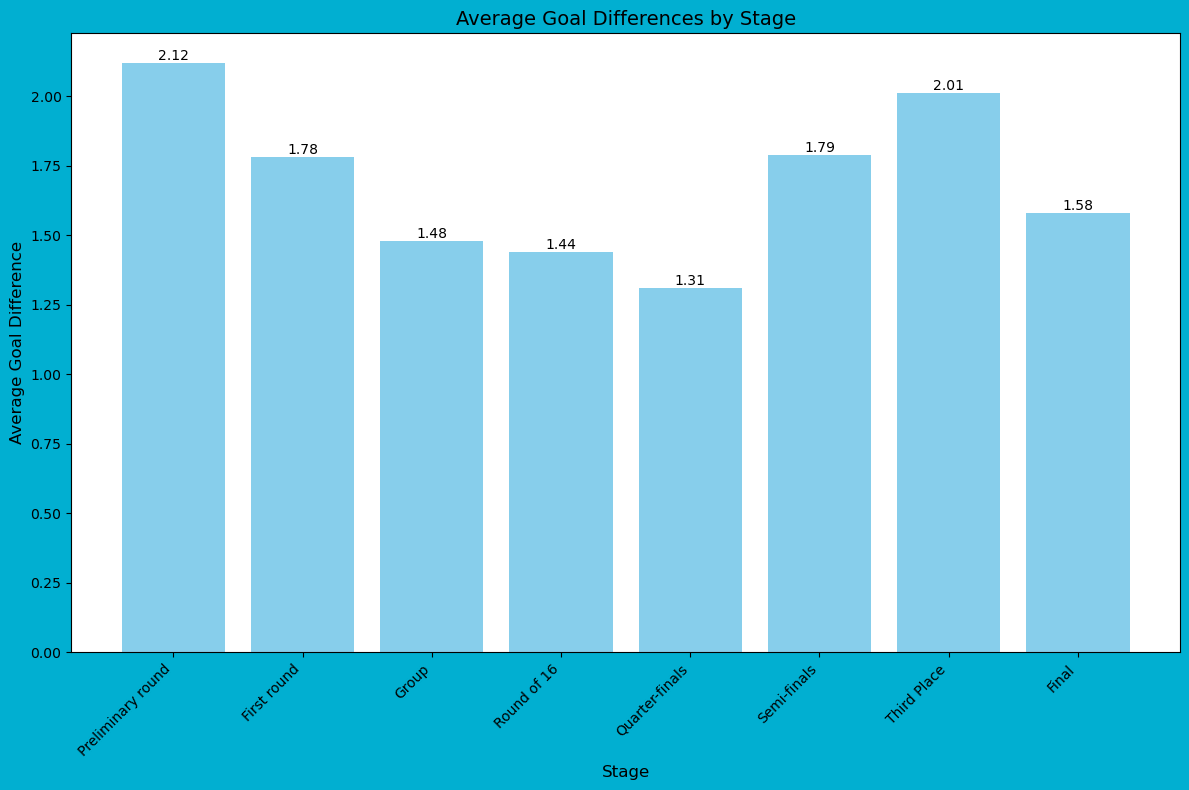

In [62]:
# Configure the bar chart
plt.figure(figsize=(12, 8), facecolor='#01afd1')
plt.bar(avg_differences_by_stage['Stage_2'], avg_differences_by_stage['avg_goal_difference'], color='skyblue')

# Add title and labels
plt.title('Average Goal Differences by Stage', fontsize=14)
plt.xlabel('Stage', fontsize=12)
plt.ylabel('Average Goal Difference', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Annotate each bar with the average goal difference value
for index, value in enumerate(avg_differences_by_stage['avg_goal_difference']):
    plt.text(index, value, f"{value:.2f}", ha='center', va='bottom')

# Show the chart
plt.tight_layout()  # Adjust layout to make room for annotations and axis labels
plt.show()